In [1]:

import pandas as pd
import numpy as np

import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sc
from src import soporte_nulos as sn

pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', None)

In [2]:
# cargamos el conjunto de datos con el que vamos a trabajar y mostramos 5 filas aleatorias
df = pd.read_csv("../data/api_rent_madrid.csv", index_col = 0, sep=";").reset_index()
df.head(1)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.00,chalet,rent,371.00,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.00,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
visualizador_todos =sc.Visualizador(df)
sc.exploracion_datos(df)

El número de filas es 450 y el número de columnas es 38

----------

En este conjunto de datos tenemos 8 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


description               0.22
hasVideo                  4.00
status                    4.00
newDevelopment            4.00
priceByArea               4.00
detailedType              4.00
suggestedTexts            4.00
hasPlan                   4.00
has3DTour                 4.00
has360                    4.00
hasStaging                4.00
superTopHighlight         4.00
topNewDevelopment         4.00
externalReference        23.33
floor                    18.67
district                 24.89
neighborhood             61.33
hasLift                   6.89
parkingSpace             68.89
labels                   93.33
newDevelopmentFinished   96.22
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,450.00,"94,635,146.39","13,858,169.73","666,696.00","97,564,945.50","98,660,320.50","98,894,324.25","98,939,685.00"
numPhotos,450.00,21.90,9.67,0.00,15.00,21.00,28.00,72.00
price,450.00,671.80,85.10,340.00,640.00,700.00,740.00,750.00
size,450.00,68.24,35.66,20.00,47.25,62.00,80.00,371.00
rooms,450.00,1.70,0.97,0.00,1.00,2.00,2.00,6.00
bathrooms,450.00,1.21,0.44,1.00,1.00,1.00,1.00,3.00
distance,450.00,"22,455.77","17,001.69",183.00,"7,104.25","20,294.00","34,979.75","59,919.00"
priceByArea,432.00,11.86,5.36,1.00,8.00,11.00,15.00,33.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,450,6,flat,356
operation,450,1,rent,450
address,450,405,"Calle Valle de Ambles, 2",10
province,450,5,Madrid,358
municipality,450,96,Madrid,170
country,450,1,es,450
latitude,450,433,404.430.651,10
longitude,450,433,-34.659.877,10
description,449,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,10
hasVideo,432,2,False,314



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            450 non-null    int64  
 1   numPhotos               450 non-null    int64  
 2   price                   450 non-null    float64
 3   propertyType            450 non-null    object 
 4   operation               450 non-null    object 
 5   size                    450 non-null    float64
 6   exterior                450 non-null    bool   
 7   rooms                   450 non-null    int64  
 8   bathrooms               450 non-null    int64  
 9   address                 450 non-null    object 
 10  province                450 non-null    object 
 11  municipality            450 non-null    object 
 12  country                 450 non-null    object 
 13  latitude                450 non

None

In [4]:
df_madrid = df[df['province'] == 'Madrid']
df_madrid = df_madrid.reset_index(drop=True)
df_madrid.head(3)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,91615378,12,750.00,flat,rent,60.00,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.00,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
1,88363329,21,750.00,flat,rent,70.00,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.00,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,False,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
2,98621753,28,400.00,penthouse,rent,67.00,True,2,2,Calle Madrid,Madrid,Villamanrique de Tajo,es,40.069.197,-3.241.383,False,55041,"A estrenar ático con piscina en Calle Madrid, ...",False,good,False,6.00,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",False,False,True,False,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN


In [5]:
df_madrid.shape[0]

358

In [6]:
df_madrid['parkingSpace'] = df_madrid['parkingSpace'].fillna('{}')  

In [7]:
df_madrid[['hasParkingSpace','isParkingSpaceIncludedInPrice','parkingSpacePrice']] = df_madrid['parkingSpace'].apply(lambda x: pd.Series(sc.extract_values_parkingSpace(x)))

In [8]:
df_madrid['detailedType'] = df_madrid['detailedType'].fillna('{}')

In [9]:
df_madrid[['typology', 'subTypology']] = df_madrid['detailedType'].apply(lambda x: pd.Series(sc.extract_values_detailedType(x)))

In [10]:
df_filtro_duplicados = df_madrid[df_madrid.duplicated()]
df_filtro_duplicados.shape[0]

5

In [11]:
df_madrid.drop_duplicates(inplace = True)

In [12]:
df_madrid = df_madrid.drop(columns=['parkingSpace','detailedType','hasPlan','address','suggestedTexts','newDevelopmentFinished','labels','province','country','propertyCode','numPhotos','latitude','longitude','description','hasVideo','has3DTour','has360','hasStaging','superTopHighlight','topNewDevelopment','externalReference','isParkingSpaceIncludedInPrice','parkingSpacePrice','distance'])

In [13]:
visualizador_madrid =sc.Visualizador(df_madrid)
sc.exploracion_datos(df_madrid)

El número de filas es 353 y el número de columnas es 19

----------

En este conjunto de datos tenemos 2 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


status             3.97
newDevelopment     3.97
priceByArea        3.97
floor             17.85
district          14.73
neighborhood      50.71
hasLift            5.10
hasParkingSpace   76.49
typology           3.97
subTypology       80.17
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
price,353.00,692.93,61.31,400.00,650.00,700.00,740.00,750.00
size,353.00,59.73,23.80,20.00,45.00,57.00,70.00,206.00
rooms,353.00,1.54,0.93,0.00,1.00,2.00,2.00,4.00
bathrooms,353.00,1.11,0.32,1.00,1.00,1.00,1.00,3.00
priceByArea,339.00,13.29,5.11,3.00,10.00,12.00,16.00,33.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,353,6,flat,277
operation,353,1,rent,353
municipality,353,62,Madrid,170
status,339,3,good,324
newDevelopment,339,2,False,326
floor,290,13,1,70
district,301,83,Centro,47
neighborhood,174,74,Lavapiés-Embajadores,11
hasLift,335,2,True,174
hasParkingSpace,83,1,True,83



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 357
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            353 non-null    float64
 1   propertyType     353 non-null    object 
 2   operation        353 non-null    object 
 3   size             353 non-null    float64
 4   exterior         353 non-null    bool   
 5   rooms            353 non-null    int64  
 6   bathrooms        353 non-null    int64  
 7   municipality     353 non-null    object 
 8   showAddress      353 non-null    bool   
 9   status           339 non-null    object 
 10  newDevelopment   339 non-null    object 
 11  priceByArea      339 non-null    float64
 12  floor            290 non-null    object 
 13  district         301 non-null    object 
 14  neighborhood     174 non-null    object 
 15  hasLift          335 non-null    object 
 16  has

None

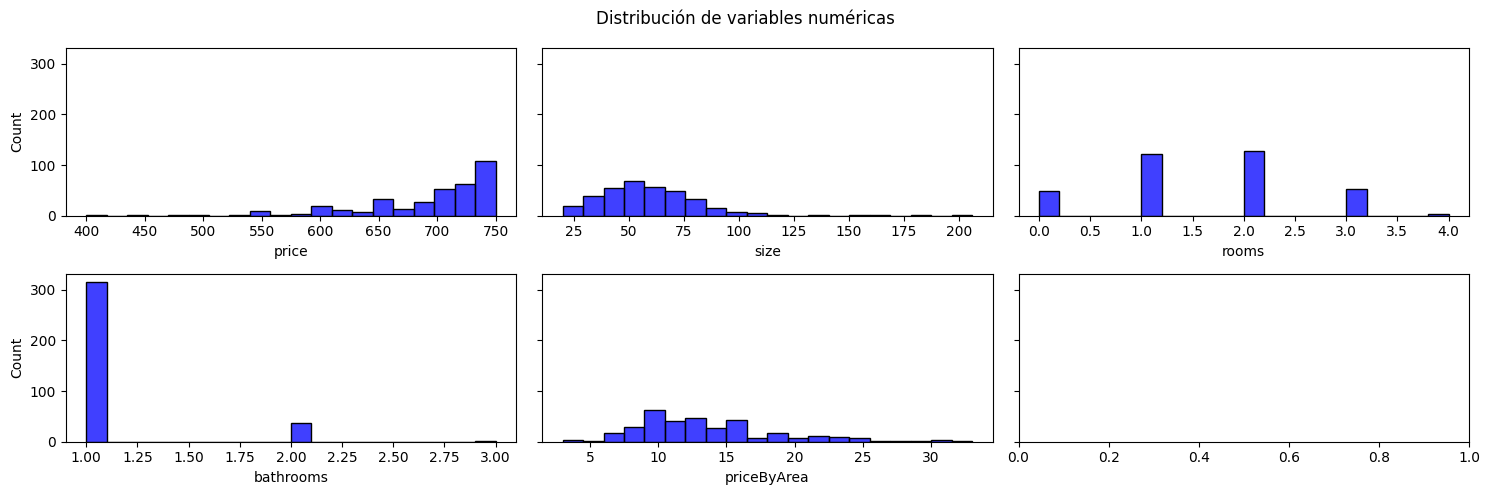

In [14]:
visualizador_madrid.plot_numericas(color = "blue")

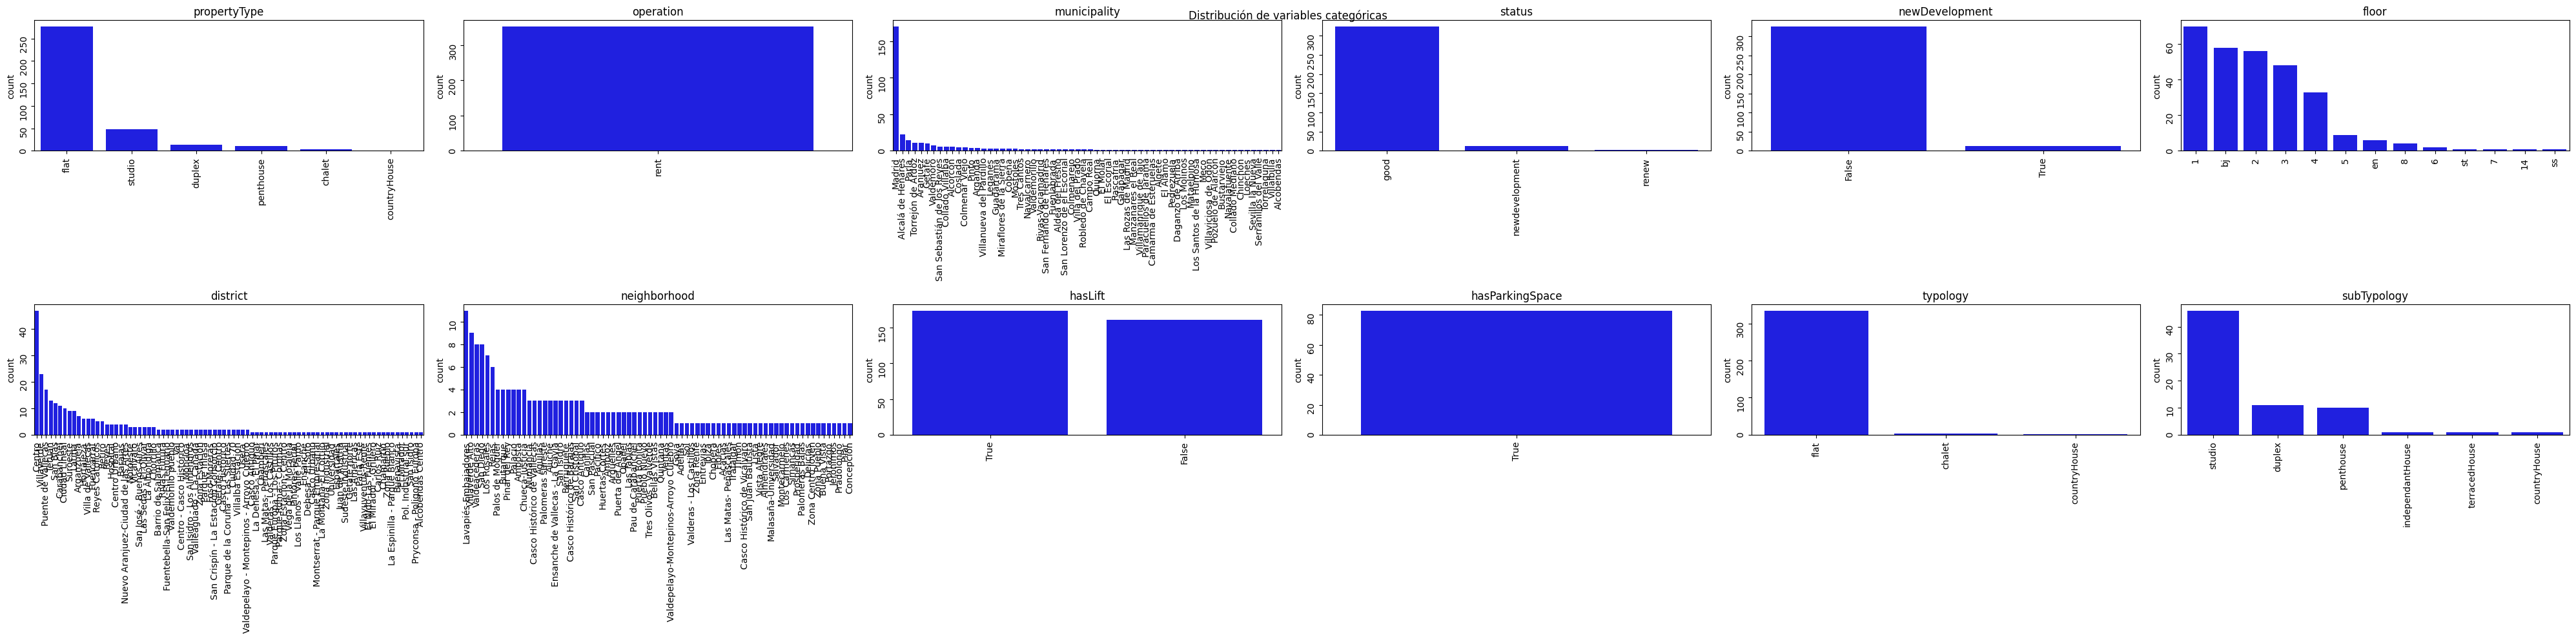

In [15]:
visualizador_madrid.plot_categoricas(color = "blue")

In [16]:
len(df_madrid.columns)

19

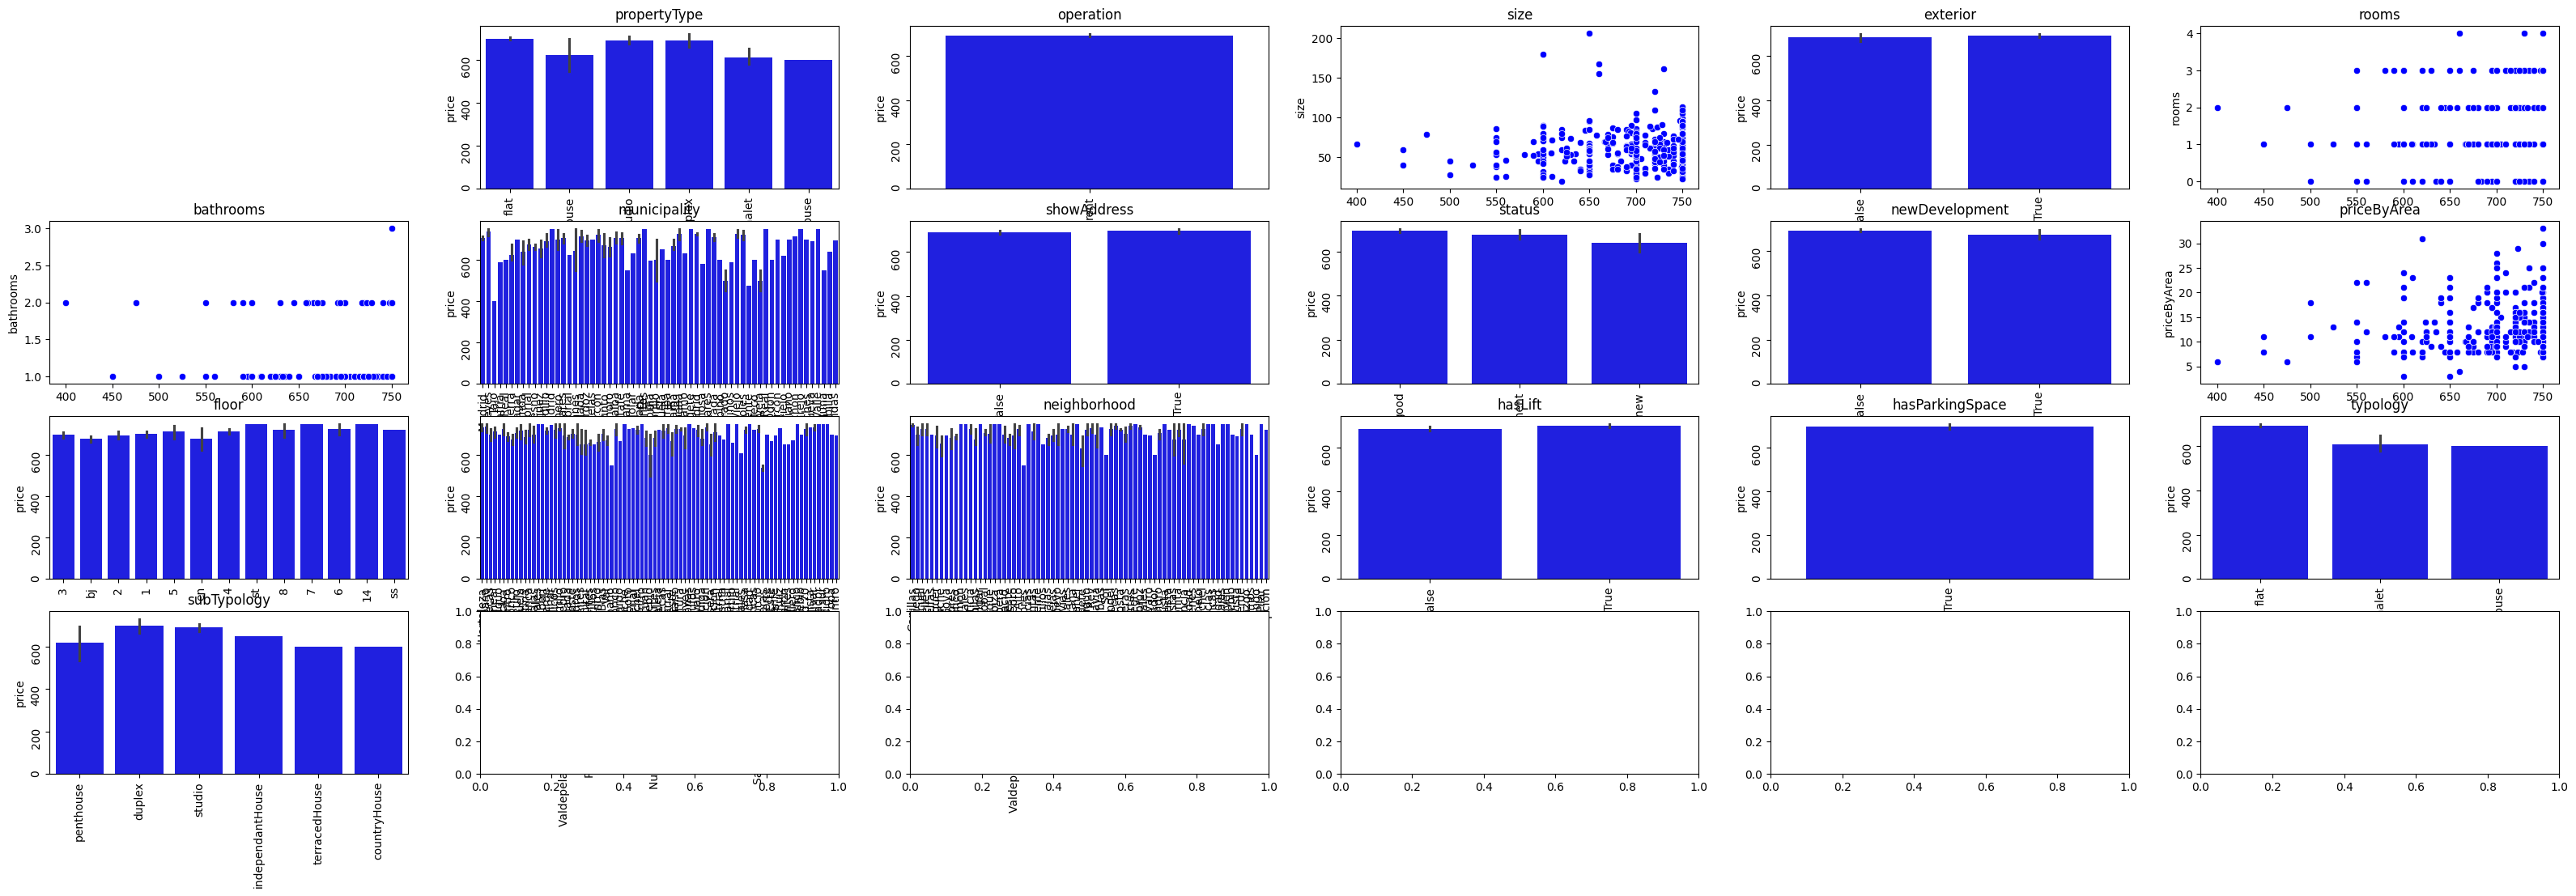

In [17]:
visualizador_madrid.plot_relacion("price", color = "blue")

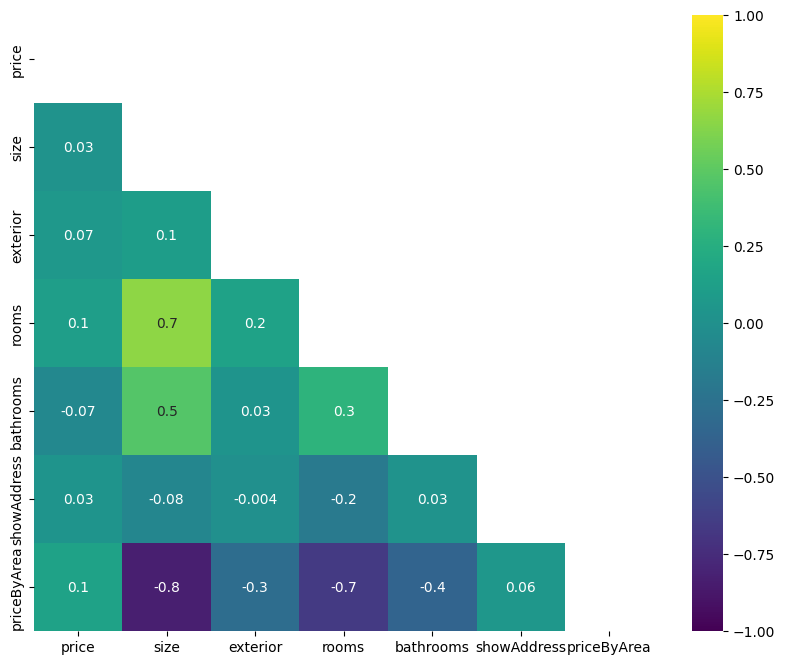

In [18]:
visualizador_madrid.correlacion(tamano_grafica=(10, 8))

In [19]:
df_madrid.to_csv("../data/api_rent_madrid_extract.csv", sep=";")